# Test: Find Tilda Parameters from the Rescaled Telegraph Model

This is a test for the `find_tilda_parameters` function from the `mean_cv_t_ac` module. The function is designed to find parameters in a rescaled space based on given mean, autocorrelation, and coefficient of variation (CV) targets.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from simulation.mean_cv_t_ac import find_tilda_parameters

In [3]:
mu_target = 15
t_ac_target = 1
cv_target = 1
# get the parameters using the scaled equations
rho,  d, sigma_b, sigma_u = find_tilda_parameters(mu_target, t_ac_target, cv_target)
print('Parameters found:', rho,  d, sigma_b, sigma_u)

✅ System is biologically appropriate with Fano factor: 15.00, CV: 1.00
Parameters found: 20144.511872411607 694.1882398909823 0.48193809441961727 0.4504130179461054


## Test Case 1: Plug Computed Parameter Back into Original Equations to Verify

In [5]:
from stats.mean import calculate_mean_from_params
from stats.variance import calculate_variance_from_params
from stats.cv import calculate_cv_from_params
from stats.fano_factor import calculate_fano_factor_from_params
from stats.autocorrelation import calculate_ac_from_params
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
mu_target = 10
t_ac_target = 2
cv_target = 0.5

# get the parameters using the scaled equations
rho,  d, sigma_b, sigma_u = find_tilda_parameters(mu_target, t_ac_target, cv_target)
print('Parameters found:', rho,  d, sigma_b, sigma_u)

# plug back in:
mu_est   = calculate_mean_from_params(rho, d, sigma_b, sigma_u)
var_est  = calculate_variance_from_params(rho, d, sigma_b, sigma_u)
cv_est   = calculate_cv_from_params(rho, d, sigma_b, sigma_u)
ac_est   = calculate_ac_from_params(rho, d, sigma_b, sigma_u, t_ac_target)

# print comparison:
print(f"Mean:   target={mu_target:.4f},   analytical={mu_est:.4f},   error={100*(mu_est-mu_target)/mu_target:.2f}%")
print(f"CV:     target={cv_target:.4f},    analytical={cv_est:.4f},    error={100*(cv_est-cv_target)/cv_target:.2f}%")
print(f"AC({t_ac_target!r}): target={np.exp(-1):.4f}, analytical={ac_est:.4f}, error={100*(ac_est-np.exp(-1))/np.exp(-1):.2f}%")

✅ System is biologically appropriate with Fano factor: 2.50, CV: 0.50
Parameters found: 10.230648670554341 0.5929029431861536 1.3183535877849781 0.9564896281574042
Mean:   target=10.0000,   analytical=10.0000,   error=0.00%
CV:     target=0.5000,    analytical=0.5000,    error=0.00%
AC(2): target=0.3679, analytical=0.3689, error=0.27%


Loop through multiple parameter combos

In [7]:
mu_target = np.logspace(0, 4, 10)  # 1 to 10000
t_ac_target = np.logspace(-0.3, 2, 10)  # ~0.5 to 100
cv_target = np.logspace(-0.3, 0.7, 20)  # ~0.5 to 5
# store the relative error for plotting later
error_data = {
    # 'sigma_sum': [],
    'mean_error': [],
    'cv_error': [],
    'ac_error': [],
    'mu': [],
    't_ac': [],
    'cv': []
}

success_data = {
    'success_count':0,
    'failure_count':0,
    'total_combo_count':len(mu_target) * len(t_ac_target) * len(cv_target)
}

# loop through every combination
for mu in mu_target:
    for t_ac in t_ac_target:
        for cv in cv_target:
            # get the parameters using the scaled equations
            try:
                rho,  d, sigma_b, sigma_u = find_tilda_parameters(mu, t_ac, cv,
                                                                #   check_biological=False
                                                                  )
                success_data['success_count'] += 1
                
                print(f"Testing with mu={mu}, t_ac={t_ac}, cv={cv}")
                print('Parameters found:', rho,  d, sigma_b, sigma_u)

                # plug back in:
                mu_est   = calculate_mean_from_params(rho, d, sigma_b, sigma_u)
                var_est  = calculate_variance_from_params(rho, d, sigma_b, sigma_u)
                cv_est   = calculate_cv_from_params(rho, d, sigma_b, sigma_u)
                ac_est   = calculate_ac_from_params(rho, d, sigma_b, sigma_u, t_ac)
                
                # calculate errors
                mean_error = abs(100*(mu_est-mu)/mu)
                cv_error = abs(100*(cv_est-cv)/cv)
                ac_error = abs(100*(ac_est-np.exp(-1))/np.exp(-1))
                
                # store data
                error_data['mean_error'].append(mean_error)
                error_data['cv_error'].append(cv_error)
                error_data['ac_error'].append(ac_error)
                error_data['mu'].append(mu)
                error_data['t_ac'].append(t_ac)
                error_data['cv'].append(cv)

                # print comparison:
                print(f"Mean:   target={mu:.4f},   analytic={mu_est:.4f},   error={mean_error:.2f}%")
                print(f"CV:     target={cv:.4f},    analytic={cv_est:.4f},    error={cv_error:.2f}%")
                print(f"AC({t_ac!r}): target={np.exp(-1):.4f}, analytic={ac_est:.4f}, error={ac_error:.2f}%")
                
            except Exception as e:
                success_data['failure_count'] += 1
                print(f"FAILED: mu={mu}, t_ac={t_ac}, cv={cv} - Error: {e}")
                # Removed the 'break' statement - now continues to next combination

FAILED: mu=1.0, t_ac=0.5011872336272722, cv=0.5011872336272722 - Error: Could not find a valid sigma_sum within bounds.
FAILED: mu=1.0, t_ac=0.5011872336272722, cv=0.5657591401470917 - Error: Could not find a valid sigma_sum within bounds.
FAILED: mu=1.0, t_ac=0.5011872336272722, cv=0.6386503549649856 - Error: Could not find a valid sigma_sum within bounds.
FAILED: mu=1.0, t_ac=0.5011872336272722, cv=0.7209327202223526 - Error: Could not find a valid sigma_sum within bounds.
FAILED: mu=1.0, t_ac=0.5011872336272722, cv=0.8138161719423083 - Error: Could not find a valid sigma_sum within bounds.
FAILED: mu=1.0, t_ac=0.5011872336272722, cv=0.9186665317542597 - Error: Could not find a valid sigma_sum within bounds.
✅ System is biologically appropriate with Fano factor: 1.08, CV: 1.04
Testing with mu=1.0, t_ac=0.5011872336272722, cv=1.037025590866764
Parameters found: 2.7714244251680378 2.042832833150992 5.6147977044066195 2.0025595496217
Mean:   target=1.0000,   analytic=1.0000,   error=0.0

In [8]:
# print success rate 
print(f"\n=== Success Rate ===")
print(f"Total combinations: {success_data['total_combo_count']}")
print(f"Successful runs: {success_data['success_count']}")
print(f"Failed runs: {success_data['failure_count']}")
print(f"Success rate: {100*success_data['success_count']/success_data['total_combo_count']:.1f}%")


=== Success Rate ===
Total combinations: 2000
Successful runs: 430
Failed runs: 1570
Success rate: 21.5%


## Test Case 2: Simulation using Parameters

In [ ]:
from simulation.simulate_telegraph_model import simulate_one_telegraph_model_system
import pandas as pd 
import numpy as np

mu_target = 15
t_ac_target = 1
cv_target = 1

# get the parameters using the scaled equations
rho,  d, sigma_b, sigma_u = find_tilda_parameters(mu_target, t_ac_target, cv_target)
print('Parameters found:', rho,  d, sigma_b, sigma_u)

parameter_set = [{'sigma_b':sigma_b,
                  'sigma_u':sigma_u,
                  'rho':rho,
                  'd':d,
                  'label':0
                  }]

time_points = np.arange(0, 144.0, 1.0)
size = 200
df_results = simulate_one_telegraph_model_system(parameter_set, time_points, size)

/home/ianyang/stochastic_simulations/src/stats/autocorrelation.py:190: RuntimeWarning: overflow encountered in exp
  numerator = d * np.exp(d - (sigma_sum) * t_ac) * rho * sigma_u - sigma_sum * ((-d**2) + rho * sigma_u + (sigma_sum ** 2))
/home/ianyang/stochastic_simulations/src/stats/autocorrelation.py:192: RuntimeWarning: invalid value encountered in scalar multiply
  return np.exp(-d * t_ac) * numerator / denominator
/home/ianyang/stochastic_simulations/src/stats/autocorrelation.py:190: RuntimeWarning: overflow encountered in scalar multiply
  numerator = d * np.exp(d - (sigma_sum) * t_ac) * rho * sigma_u - sigma_sum * ((-d**2) + rho * sigma_u + (sigma_sum ** 2))


✅ System is biologically appropriate with Fano factor: 15.00, CV: 1.00
Parameters found: 20144.511872411607 694.1882398909823 0.48193809441961727 0.4504130179461054


Simulating Telegraph Model Systems:   0%|          | 0/1 [00:00<?, ?it/s]

Running simulations on 12 cores...
System 1 parameters: {'sigma_b': 0.48193809441961727, 'sigma_u': 0.4504130179461054, 'rho': 20144.511872411607, 'd': 694.1882398909823, 'label': 0}


Process ForkPoolWorker-1:
Process ForkPoolWorker-12:
Process ForkPoolWorker-3:
Process ForkPoolWorker-11:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-4:
Process ForkPoolWorker-9:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-5:
Process ForkPoolWorker-2:
  File "/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process ForkPoolWorker-10:
Traceback (most recent call last):
  File "/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run(

In [ ]:
# check the specified stats
from stats.mean import calculate_mean
from stats.variance import calculate_variance
from stats.cv import calculate_cv
from stats.autocorrelation import calculate_autocorrelation, calculate_ac_time_interp1d

# Extract normal trajectories (remove label column and convert to numpy array)
trajectories = df_results[df_results['label'] == 0].drop('label', axis=1).values

# Extract mean and variance from the report
mean_observed = calculate_mean(trajectories, parameter_set, use_steady_state=False)
variance_observed = calculate_variance(trajectories, parameter_set, use_steady_state=False)

# Calculate CV using calculate_cv function
cv_observed = calculate_cv(variance_observed, mean_observed)

# Calculate autocorrelation for the trajectories
autocorr_results = calculate_autocorrelation(df_results)

# Get mean autocorrelation values and lags for stress condition (label=0 in this case)
ac_mean = autocorr_results['stress_ac'].mean(axis=0)  # stress_ac corresponds to label=0
lags = autocorr_results['stress_lags']

# Calculate autocorrelation time using interpolation
ac_time_observed = calculate_ac_time_interp1d(ac_mean, lags)

print(f"\n=== Observed Statistics vs Targets ===")
print(f"Mean: Target = {mu_target}, Observed = {mean_observed:.3f}")
print(f"CV: Target = {cv_target}, Observed = {cv_observed:.3f}")
print(f"AC Time: Target = {t_ac_target}, Observed = {ac_time_observed:.3f}")
print(f"Variance: Observed = {variance_observed:.3f}")


=== Observed Statistics vs Targets ===
Mean: Target = 15, Observed = 15.161
CV: Target = 1, Observed = 0.988
AC Time: Target = 1, Observed = 0.996
Variance: Observed = 224.538


/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ianyang/stochastic_simulations/micromamba/envs/stochastic_sim/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


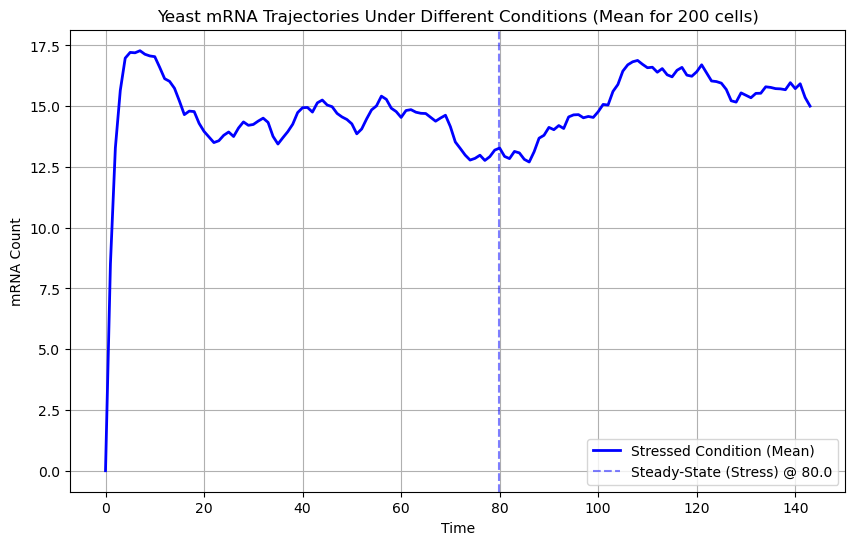

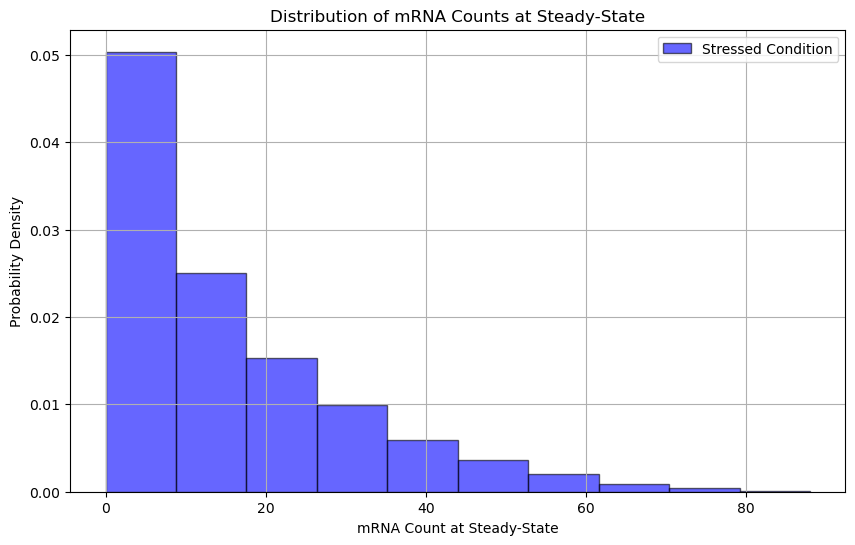

In [ ]:
from visualisation.plots import plot_mRNA_dist, plot_mRNA_trajectory
# Plots
plot_mRNA_trajectory(parameter_set, time_points, trajectories)
plot_mRNA_dist(parameter_set, trajectories)

Do this for multiple parameter combos

In [ ]:
mu_target = np.logspace(0, 4, 10)  # 1 to 10000
t_ac_target = np.logspace(-0.3, 2, 10)  # ~0.5 to 100
cv_target = np.logspace(-0.3, 0.7, 20)  # ~0.5 to 5

success_data = {
    'success_count':0,
    'failure_count':0,
    'total_combo_count':len(mu_target) * len(t_ac_target) * len(cv_target)
}

# loop through every combination
for mu in mu_target:
    for t_ac in t_ac_target:
        for cv in cv_target:
            # get the parameters using the scaled equations
            try:
                rho,  d, sigma_b, sigma_u = find_tilda_parameters(mu, t_ac, cv,
                                                                #   check_biological=False
                                                                  )
                success_data['success_count'] += 1
                
                print(f"Testing with mu={mu}, t_ac={t_ac}, cv={cv}")
                print('Parameters found:', rho,  d, sigma_b, sigma_u)

                parameter_set = [{'sigma_b':sigma_b,
                  'sigma_u':sigma_u,
                  'rho':rho,
                  'd':d,
                  'label':0
                  }]
                
                # simulate data
                time_points = np.arange(0, 144.0, 1.0)
                size = 200
                df_results = simulate_one_telegraph_model_system(parameter_set, time_points, size)
                
                # Extract normal trajectories (remove label column and convert to numpy array)
                trajectories = df_results[df_results['label'] == 0].drop('label', axis=1).values
                mean_observed = calculate_mean(trajectories, parameter_set, use_steady_state=False)
                variance_observed = calculate_variance(trajectories, parameter_set, use_steady_state=False)
                cv_observed = calculate_cv(variance_observed, mean_observed)
                autocorr_results = calculate_autocorrelation(df_results)
                
                # Get mean autocorrelation values and lags for stress condition (label=0 in this case)
                ac_mean = autocorr_results['stress_ac'].mean(axis=0)  # stress_ac corresponds to label=0
                lags = autocorr_results['stress_lags']
                ac_time_observed = calculate_ac_time_interp1d(ac_mean, lags)

                print(f"\n=== Observed Statistics vs Targets ===")
                print(f"Mean: Target = {mu}, Observed = {mean_observed:.3f}")
                print(f"CV: Target = {cv}, Observed = {cv_observed:.3f}")
                print(f"AC Time: Target = {t_ac}, Observed = {ac_time_observed:.3f}")
                print(f"Variance: Observed = {variance_observed:.3f}")
                
                # Allow small deviations due to stochasticity in the simulation
                assert abs(mean_observed - mu) / mu < 0.2
                assert abs(cv_observed - cv) / cv < 0.2
                assert abs(ac_time_observed - t_ac) / t_ac < 0.2             
            except Exception as e:
                success_data['failure_count'] += 1
                print(f"FAILED: mu={mu}, t_ac={t_ac}, cv={cv} - Error: {e}")
                # Removed the 'break' statement - now continues to next combination